<a href="https://colab.research.google.com/github/zeyadsheriif/Diabetes-Explainatory-and-interpretability-project/blob/main/diabete_project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [259]:
import kagglehub
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    confusion_matrix, accuracy_score,
    precision_score, recall_score
)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.inspection import permutation_importance
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.inspection import PartialDependenceDisplay
import lime
import lime.lime_tabular
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.inspection import PartialDependenceDisplay
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [260]:
from lime.lime_tabular import LimeTabularExplainer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [261]:
pip install lime

# Load Dataset

In [262]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pima-indians-diabetes-database


In [263]:
csv_path = os.path.join(path, "diabetes.csv")

df = pd.read_csv(csv_path)

In [264]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [265]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [266]:
df.isna().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [267]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**NO one has zero insulin/ zero glucose/ skinThickness / bloodpressure / BMI**


In [268]:
d=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
d.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [269]:
d.isnull().sum()[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


In [270]:
df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(),inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(),inplace=True)
df['Insulin'].fillna(df['Insulin'].median(),inplace=True)
df['BMI'].fillna(df['BMI'].median(),inplace=True)
df.head()

<ipython-input-270-6bbaf0f19519>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Glucose'].fillna(df['Glucose'].median(),inplace=True)
<ipython-input-270-6bbaf0f19519>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# Splitting dataset

In [271]:
selected_features = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']
X_selected = df[selected_features]
y = df['Outcome']

In [272]:
# Step 2: Scale features
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)


In [273]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_scaled_selected, y, test_size=0.2, random_state=42
)

# **Model 1: Support Vector Machine (SVM)**

### Filter selected features


In [274]:
selected_features = ['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction']
X_selected = df[selected_features]
y = df['Outcome']

In [275]:
# Step 2: Scale features
scaler = StandardScaler()
X_scaled_selected = scaler.fit_transform(X_selected)


In [276]:
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
    X_scaled_selected, y, test_size=0.2, random_state=42
)

## (1) Linear

In [277]:
svm_selected = SVC(kernel='linear', probability=True)
svm_selected.fit(X_train_sel, y_train_sel)


SVC(kernel='linear', probability=True)

In [278]:

y_pred_sel = svm_selected.predict(X_test_sel)

# Step 6: Evaluate
print("Classification Report (SVM with selected features):")
print(classification_report(y_test_sel, y_pred_sel))

Classification Report (SVM with selected features):
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154



In [279]:
print(f"Accuracy: {accuracy_score(y_test_sel, y_pred_sel) * 100:.2f}%")


Accuracy: 77.92%


In [280]:
svm_selected = SVC(kernel='rbf', probability=True)
svm_selected.fit(X_train_sel, y_train_sel)

SVC(probability=True)

In [281]:

# Step 5: Make predictions
y_pred_sel = svm_selected.predict(X_test_sel)

# Step 6: Evaluate
print("Classification Report (SVM with selected features):")
print(classification_report(y_test_sel, y_pred_sel))

Classification Report (SVM with selected features):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [282]:
print(f"Accuracy: {accuracy_score(y_test_sel, y_pred_sel) * 100:.2f}%")


Accuracy: 77.27%


### Confusion Matrix


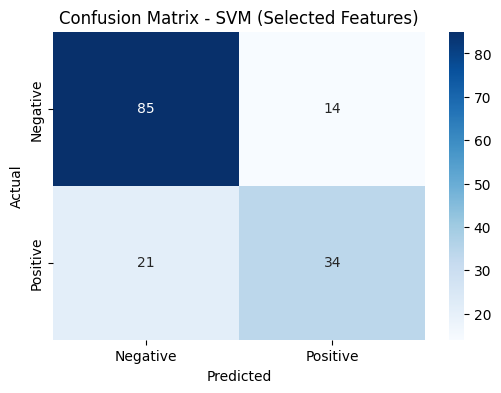

In [283]:

cm_sel = confusion_matrix(y_test_sel, y_pred_sel)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_sel, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM (Selected Features)')
plt.show()


### ROC Curve

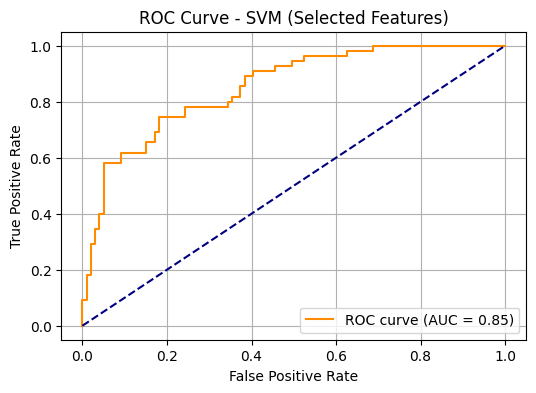

In [284]:
y_scores_sel = svm_selected.predict_proba(X_test_sel)[:, 1]
fpr_sel, tpr_sel, thresholds_sel = roc_curve(y_test_sel, y_scores_sel)
roc_auc_sel = auc(fpr_sel, tpr_sel)

plt.figure(figsize=(6, 4))
plt.plot(fpr_sel, tpr_sel, color='darkorange', label=f'ROC curve (AUC = {roc_auc_sel:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Selected Features)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




---



##(2) RBF

In [285]:

svm_rbf = SVC(kernel='rbf', C=1.0, probability=True)
svm_rbf.fit(X_train_sel, y_train_sel)



SVC(probability=True)

In [286]:
# Predict
y_pred_rbf = svm_rbf.predict(X_test_sel)

# Evaluate
print("Classification Report (RBF SVM):")
print(classification_report(y_test_sel, y_pred_rbf))
print(f"Accuracy: {accuracy_score(y_test_sel, y_pred_rbf) * 100:.2f}%")



Classification Report (RBF SVM):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Accuracy: 77.27%


### Confusion Matrix


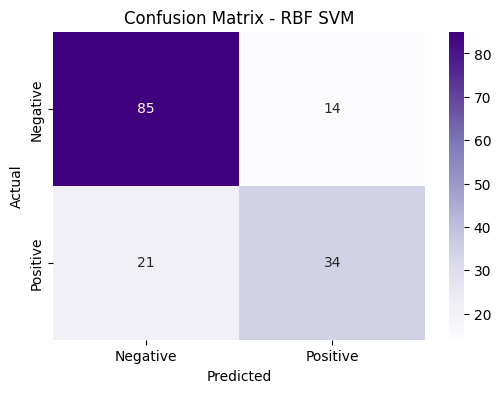

In [287]:

cm_rbf = confusion_matrix(y_test_sel, y_pred_rbf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Purples', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RBF SVM')
plt.show()


### ROC Curve


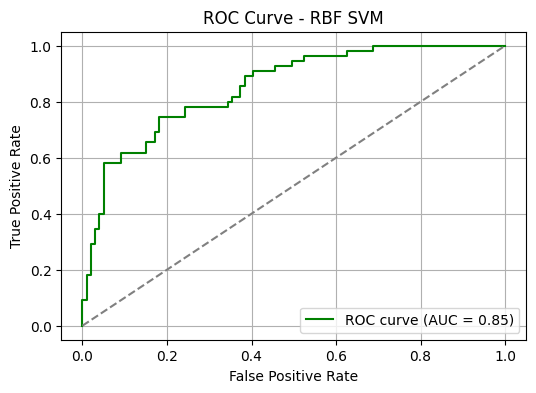

In [288]:
# ROC Curve
y_scores_rbf = svm_rbf.predict_proba(X_test_sel)[:, 1]
fpr_rbf, tpr_rbf, thresholds_rbf = roc_curve(y_test_sel, y_scores_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rbf, tpr_rbf, color='green', label=f'ROC curve (AUC = {roc_auc_rbf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RBF SVM')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## (3) Grid Search for poly kernel only


In [289]:
param_grid_poly = {
    'kernel': ['poly'],
    'C': [10],
    'gamma': [0.01, 0.1, 1],
    'degree': [2, 3, 4]
}

svm_poly = SVC()
grid_poly = GridSearchCV(estimator=svm_poly, param_grid=param_grid_poly,
                         scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_poly.fit(X_train_sel, y_train_sel)

print("Best Parameters for Poly Kernel:")
print(grid_poly.best_params_)

best_poly = grid_poly.best_estimator_
y_pred_poly = best_poly.predict(X_test_sel)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for Poly Kernel:
{'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}


In [290]:

print("\nClassification Report (Poly Kernel):")
print(classification_report(y_test_sel, y_pred_poly))
print(f"Test Accuracy (Poly Kernel): {accuracy_score(y_test_sel, y_pred_poly) * 100:.2f}%")


Classification Report (Poly Kernel):
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        99
           1       0.76      0.47      0.58        55

    accuracy                           0.76       154
   macro avg       0.76      0.70      0.71       154
weighted avg       0.76      0.76      0.74       154

Test Accuracy (Poly Kernel): 75.97%


##(4) Grid Search for sigmoid kernel only

In [291]:
param_grid_sigmoid = {
    'kernel': ['sigmoid'],
    'C': [10],
    'gamma': [0.01, 0.1, 1]
}

svm_sigmoid = SVC()
grid_sigmoid = GridSearchCV(estimator=svm_sigmoid, param_grid=param_grid_sigmoid,
                            scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

grid_sigmoid.fit(X_train_sel, y_train_sel)

print("\nBest Parameters for Sigmoid Kernel:")
print(grid_sigmoid.best_params_)

best_sigmoid = grid_sigmoid.best_estimator_
y_pred_sigmoid = best_sigmoid.predict(X_test_sel)

print("\nClassification Report (Sigmoid Kernel):")
print(classification_report(y_test_sel, y_pred_sigmoid))
print(f"Test Accuracy (Sigmoid Kernel): {accuracy_score(y_test_sel, y_pred_sigmoid) * 100:.2f}%")


Fitting 5 folds for each of 3 candidates, totalling 15 fits

Best Parameters for Sigmoid Kernel:
{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}

Classification Report (Sigmoid Kernel):
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

Test Accuracy (Sigmoid Kernel): 77.92%


## The Best Kernel

In [292]:
param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10, 100]
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.1, 1, 10]
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'degree': [2, 3, 4]
    },
    {
        'kernel': ['sigmoid'],
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1]
    }
]

In [293]:
svm_model = SVC()
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)


In [294]:
grid_search.fit(X_train_sel, y_train_sel)


Fitting 5 folds for each of 56 candidates, totalling 280 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.1, 1], 'kernel': ['poly']},
                         {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                          'kernel': ['sigmoid']}],
             scoring='accuracy', verbose=1)

In [295]:
# Get best parameters and estimator
print("Best Parameters Found:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_sel)

print("\nClassification Report on Test Set:")
print(classification_report(y_test_sel, y_pred_sel))

print(f"Test Accuracy: {accuracy_score(y_test_sel, y_pred_sel) * 100:.2f}%")

Best Parameters Found:
{'C': 10, 'kernel': 'linear'}

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

Test Accuracy: 77.27%


## Evaluate the model


### Assumption 1: Absence of Multicollinearity

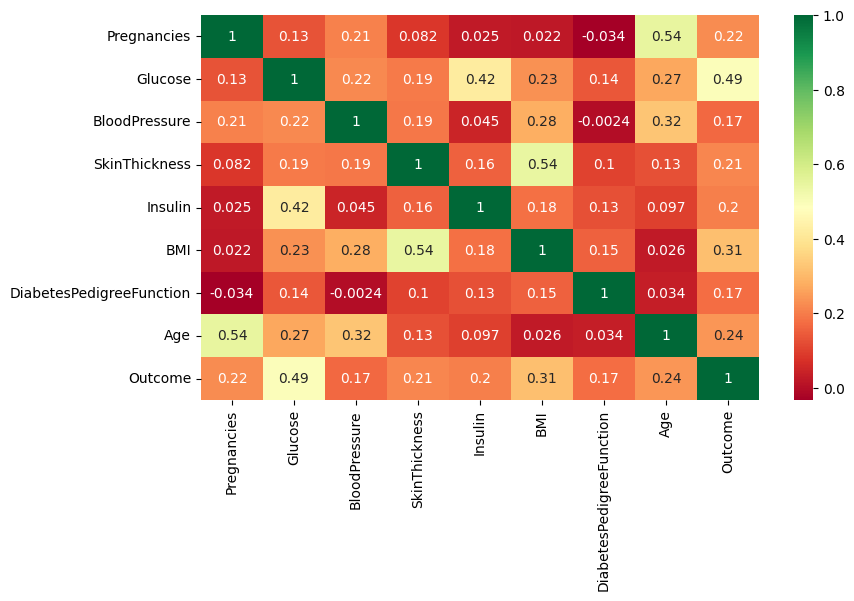

In [296]:
corrMatrix = df.corr()
plt.subplots(figsize=(9, 5))
sns.heatmap(corrMatrix, annot=True, cmap="RdYlGn")
plt.show()

In [297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Feature        VIF
0               Pregnancies   3.275748
1                   Glucose  16.725078
2             BloodPressure  14.619512
3             SkinThickness   4.008696
4                   Insulin   2.063689
5                       BMI  18.408884
6  DiabetesPedigreeFunction   3.195626
7                       Age  13.492985


### [1] Lime

In [298]:


explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_sel,  # Training data
    training_labels=y_train_sel,  # Labels of the training data
    mode='classification',
    feature_names=selected_features,  # Feature names
    class_names=['Negative', 'Positive'],  # Class names
    discretize_continuous=True  # Discretize continuous features
)

# Choose an instance from the test set to explain
i = 10
instance = X_test_sel[i].reshape(1, -1)

# Get explanation for the instance
explanation = explainer.explain_instance(instance[0], svm_selected.predict_proba)

explanation.show_in_notebook()


In [299]:
X_train_sel_df = pd.DataFrame(X_train_sel, columns=selected_features)

svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_sel, y_train_sel)


SVC(kernel='linear', probability=True, random_state=42)



### [2] Partial Dependence Plot (PDP)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr

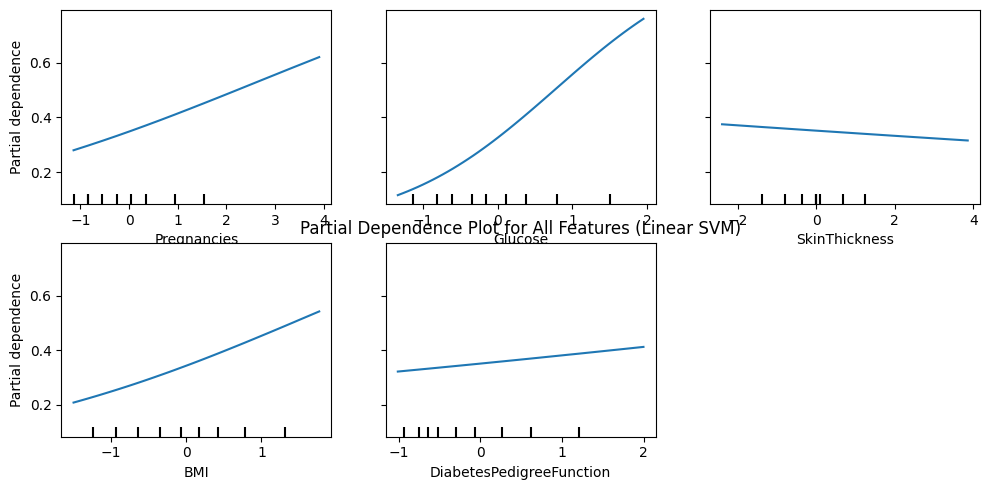

In [300]:
fig, ax = plt.subplots(figsize=(10, 5))
PartialDependenceDisplay.from_estimator(
    estimator=svm_linear,
    X=X_train_sel_df,
    features=X_train_sel_df.columns.tolist(),
    kind="average",
    grid_resolution=50,
    ax=ax
)
plt.title("Partial Dependence Plot for All Features (Linear SVM)")
plt.tight_layout()
plt.show()


### [4] Permutation Feature Importance

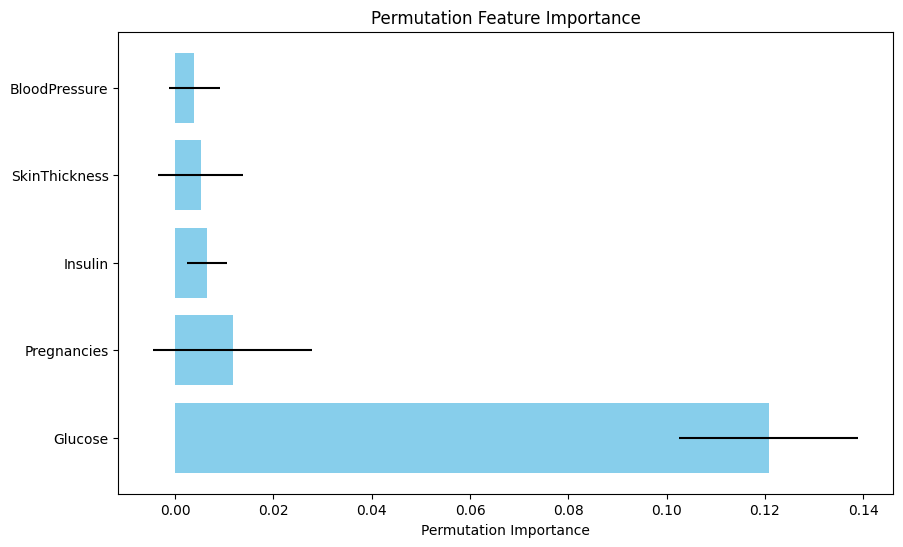

In [301]:

# Perform permutation importance
results = permutation_importance(svm_linear, X_test_sel, y_test_sel, scoring='accuracy')

# Get the importance scores for features
importance = results.importances_mean
std = results.importances_std

# Sort the importance values in descending order
sorted_idx = np.argsort(importance)[::-1]
sorted_features = X.columns[sorted_idx]
sorted_importance = importance[sorted_idx]
sorted_std = std[sorted_idx]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, xerr=sorted_std, color='skyblue')
plt.xlabel('Permutation Importance')
plt.title('Permutation Feature Importance')
plt.show()


###[3] Individual Conditional Expectation (ICE)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr

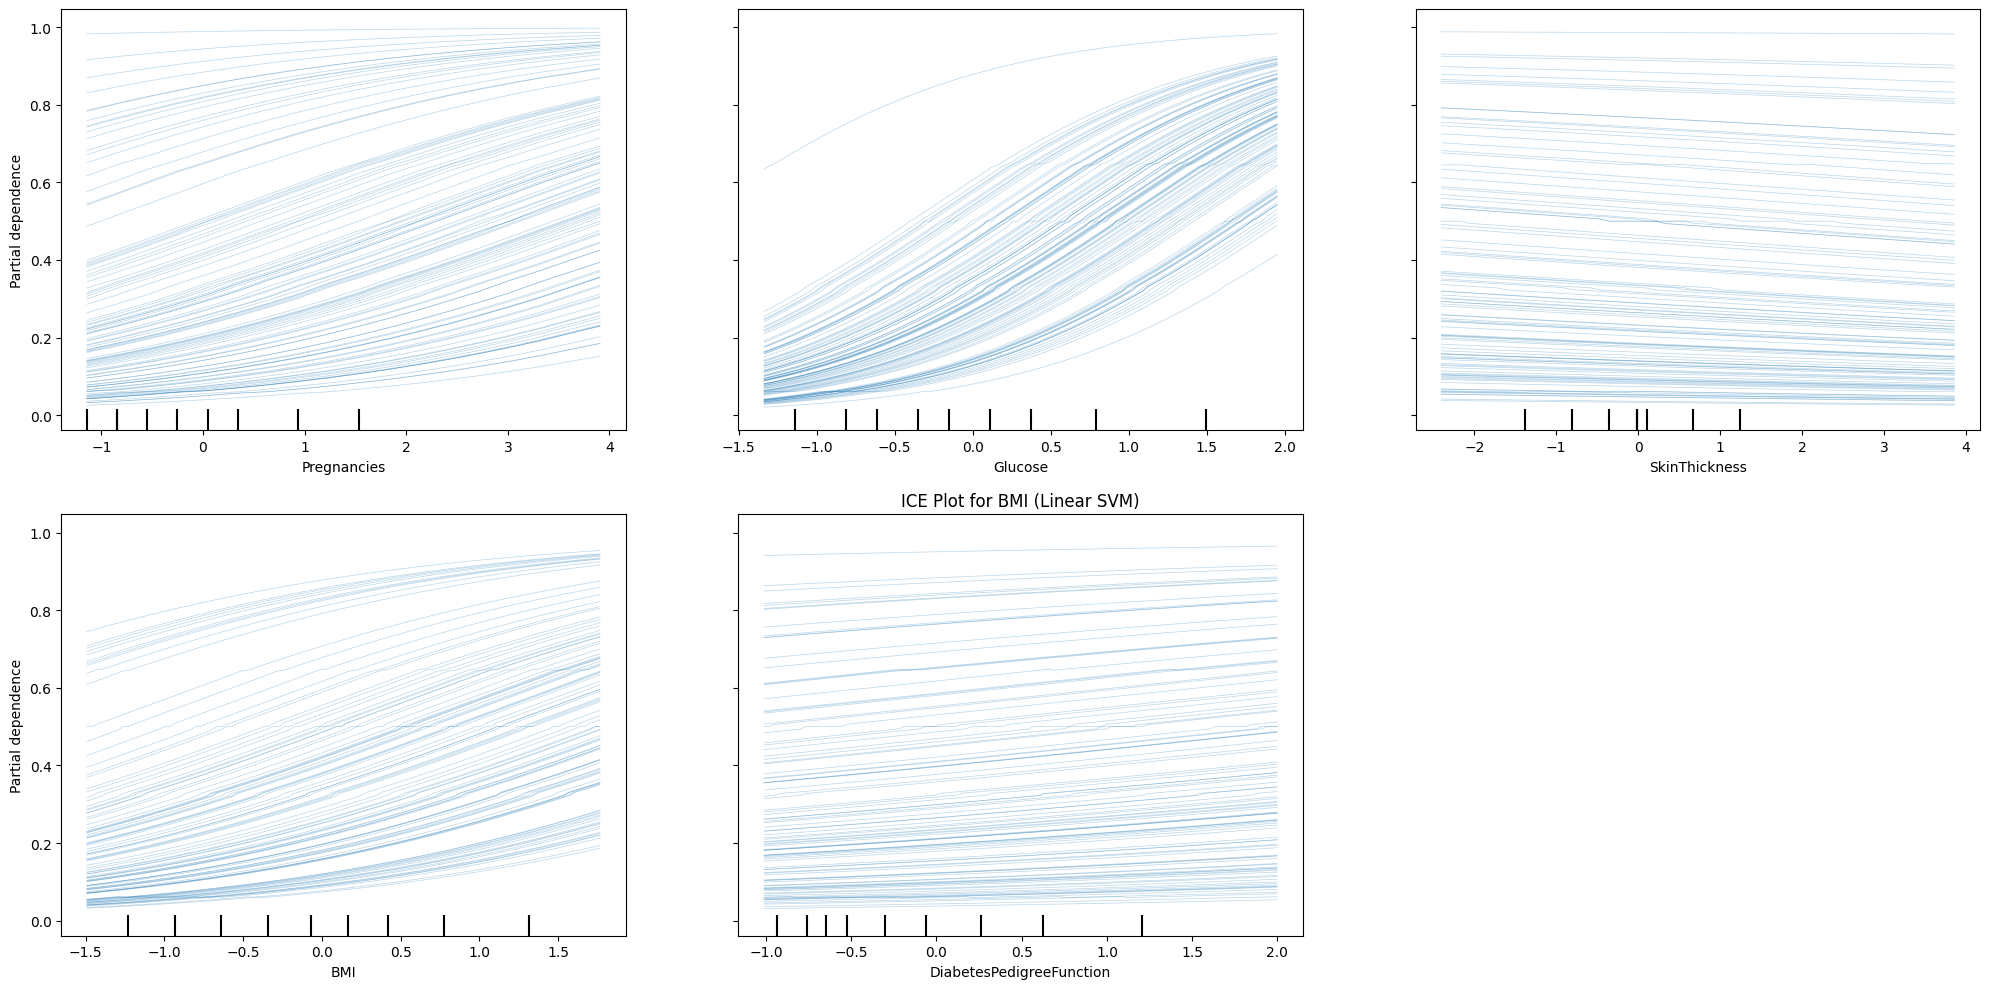

In [302]:
fig, ax = plt.subplots(figsize=(20, 10))
PartialDependenceDisplay.from_estimator(
    estimator=svm_linear,
    X=X_train_sel_df,
    features=X_train_sel_df.columns.tolist(),
    kind="individual",
    subsample=100,
    random_state=42,
    ax=ax
)
plt.title("ICE Plot for BMI (Linear SVM)")
plt.tight_layout()
plt.show()


###[5] LOFO

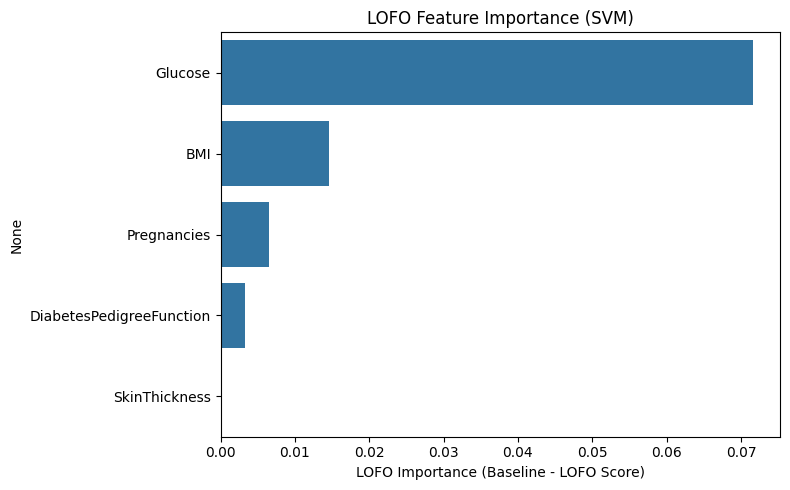

In [305]:

# Convert scaled arrays to DataFrame to support column operations
X_train_df = pd.DataFrame(X_train_sel, columns=selected_features)

# Baseline score using all features
baseline = cross_val_score(svm_linear, X_train_df, y_train_sel, cv=5).mean()

# LOFO Importance using Naive Bayes
lofo_scores = {}
for col in X_train_df.columns:
    X_lofo = X_train_df.drop(columns=[col])
    score = cross_val_score(svm_linear, X_lofo, y_train_sel, cv=5).mean()
    lofo_scores[col] = baseline - score

# Plot LOFO results
lofo_df = pd.Series(lofo_scores).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=lofo_df.values, y=lofo_df.index)
plt.xlabel("LOFO Importance (Baseline - LOFO Score)")
plt.title("LOFO Feature Importance (SVM)")
plt.tight_layout()
plt.show()
